# Tyrese Maxey Advanced Shooting Analysis

* This notebook analyzes the shooting progression of Tyrese Maxey throughout his whole career involving datasets:
    1. adjusted_shooting.csv: the shooting data of Tyrese Maxey throughout his pro career
    2. college_per_game.csv: the shooting data of Tyrese Maxey throughout his collegiate career
    3. maxey_shot_distance.csv: the distance of shots Tyrese Maxey took throughout his career
    4. maxey_shot_type.csv: the type of shots Tyrese Maxey took throughout his career

In [1]:
import warnings
warnings.simplefilter('ignore')
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Cleaning and Organizing

In [2]:
shooting_df = pd.read_csv('../data/adjusted_shooting.csv')
shooting_df.shape

(5, 39)

In [3]:
shooting_df.columns

Index(['Season', 'Age', 'Season.1', 'Age.1', 'Tm', 'Lg', 'Pos', 'G', 'MP',
       'Unnamed: 9', 'FG', '2P', '3P', 'eFG', 'FT', 'TS', 'FTr', '3PAr',
       'Unnamed: 18', 'FG.1', '2P.1', '3P.1', 'eFG.1', 'FT.1', 'TS.1', 'FTr.1',
       '3PAr.1', 'Unnamed: 27', 'FG+', '2P+', '3P+', 'eFG+', 'FT+', 'TS+',
       'FTr+', '3PAr+', 'Unnamed: 36', 'FG Add', 'TS Add'],
      dtype='object')

In [4]:
shooting_df.head(5)

,Season,Age,Season.1,Age.1,Tm,Lg,Pos,G,MP,Unnamed: 9,...,2P+,3P+,eFG+,FT+,TS+,FTr+,3PAr+,Unnamed: 36,FG Add,TS Add
0,2020-21,20.0,2020-21,20.0,PHI,NBA,SG,61,935,NaN,...,97,82,93,112,93,66,61,NaN,-34.5,-37.8
1,2021-22,21.0,2021-22,21.0,PHI,NBA,PG,75,2650,NaN,...,96,121,104,112,105,100,78,NaN,39.9,62.1
2,2022-23,22.0,2022-23,22.0,PHI,NBA,SG,60,2016,NaN,...,94,120,104,108,104,88,104,NaN,42.4,47.7
3,2023-24,23.0,2023-24,23.0,PHI,NBA,PG,18,691,NaN,...,95,109,101,115,104,106,105,NaN,4.2,17.1
4,NaN,NaN,Career,NaN,NaN,NBA,NaN,214,6292,NaN,...,95,114,102,111,103,91,88,NaN,52.0,89.1


In [5]:
college_shooting_df = pd.read_csv('../data/college_per_game.csv')
college_shooting_df.shape

(2, 30)

In [6]:
college_shooting_df.columns

Index(['Season', 'School', 'Conf', 'Class', 'G', 'GS', 'MP', 'FG', 'FGA',
       'FG%', '2P', '2PA', '2P%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'Unnamed: 28', 'SOS'],
      dtype='object')

In [7]:
college_shooting_df

,Season,School,Conf,Class,G,GS,MP,FG,FGA,FG%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Unnamed: 28,SOS
0,2019-20,Kentucky,SEC,FR,31,28,34.5,4.8,11.3,0.427,...,3.9,4.3,3.2,0.9,0.4,2.2,2.4,14.0,NaN,7.46
1,Career,Kentucky,NaN,NaN,31,28,34.5,4.8,11.3,0.427,...,3.9,4.3,3.2,0.9,0.4,2.2,2.4,14.0,NaN,7.46


In [8]:
columns_to_drop = ['Season.1', 'Age', 'Age.1', 'FTr', '3PAr', 'Unnamed: 18', 'FG.1', '2P.1', '3P.1', 'eFG.1', 'FT.1', 'TS.1', 'FTr.1', '3PAr.1', 'Unnamed: 27', 'FG+', '2P+', '3P+', 'eFG+', 'FT+', 'TS+', 'FTr+', '3PAr+', 'Unnamed: 36', 'FG Add', 'TS Add', 'Unnamed: 9', 'G', 'MP', 'Pos']
rows_to_drop = [4]
shooting_df.drop(rows_to_drop, axis=0, inplace=True)
shooting_df.drop(columns=columns_to_drop, axis=1, inplace=True)

In [9]:
shooting_df

,Season,Tm,Lg,FG,2P,3P,eFG,FT,TS
0,2020-21,PHI,NBA,0.462,0.512,0.301,0.498,0.871,0.531
1,2021-22,PHI,NBA,0.485,0.512,0.427,0.552,0.866,0.594
2,2022-23,PHI,NBA,0.481,0.513,0.434,0.568,0.845,0.605
3,2023-24,PHI,NBA,0.464,0.512,0.396,0.545,0.899,0.596


In [10]:
columns_to_drop = ['Class', 'G', 'GS', 'MP','FGA','FG%', '2P', '2PA','3P', '3PA', 'FT', 'FTA','ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS','Unnamed: 28', 'SOS']
rows_to_drop = [1]
college_shooting_df.drop(rows_to_drop, axis=0, inplace=True)
college_shooting_df.drop(columns=columns_to_drop, axis=1, inplace=True)

### Analysis

In [11]:
college_shooting_df

,Season,School,Conf,FG,2P%,3P%,FT%
0,2019-20,Kentucky,SEC,4.8,0.492,0.292,0.833


Maxey's three point percentage in college was one of the biggest knocks on him coming out of the draft.

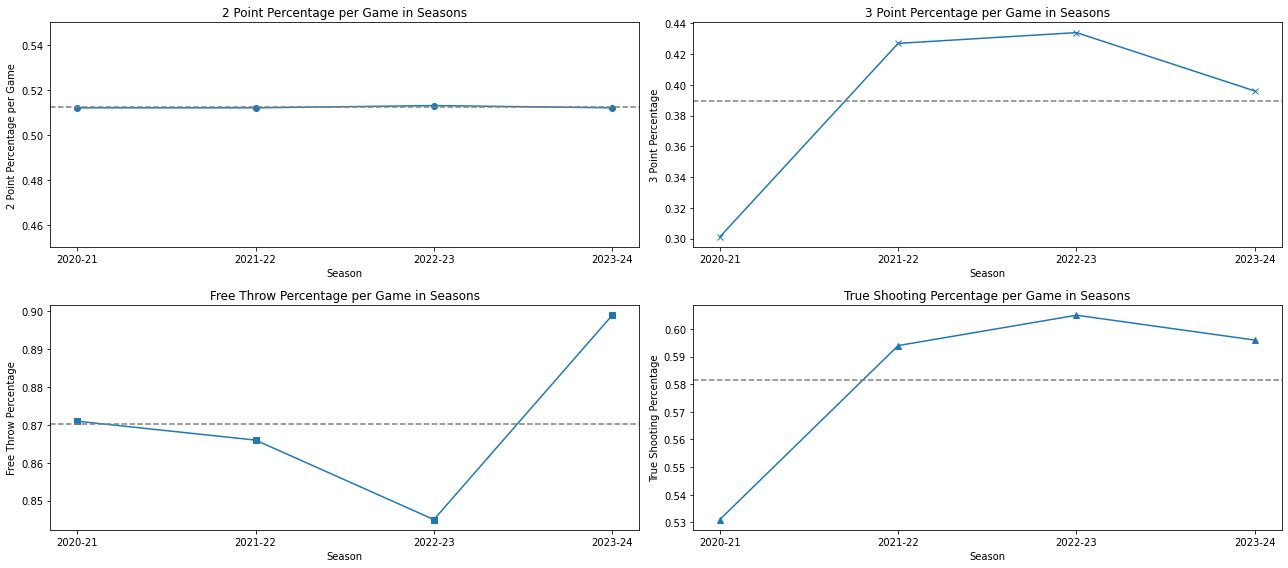

In [12]:
fig, axs = plt.subplots(2, 2, figsize=(18, 8))  # Create a 2x3 grid

# the first subplot (2 Point Percentage)
axs[0, 0].plot(shooting_df['Season'], shooting_df['2P'], marker='o')
axs[0, 0].set_title('2 Point Percentage per Game in Seasons')
axs[0, 0].set_xlabel('Season')
axs[0, 0].set_ylabel('2 Point Percentage per Game')
axs[0, 0].axhline(y=shooting_df['2P'].mean(), linestyle='--', color='gray', label='Career Avg')
axs[0, 0].set_ylim(bottom=0.45, top=0.55)  # Set y-limit for the first subplot

# the second subplot (3 Point Percentage)
axs[0, 1].plot(shooting_df['Season'], shooting_df['3P'], marker='x')
axs[0, 1].set_title('3 Point Percentage per Game in Seasons')
axs[0, 1].set_xlabel('Season')
axs[0, 1].set_ylabel('3 Point Percentage')
axs[0, 1].axhline(y=shooting_df['3P'].mean(), linestyle='--', color='gray', label='Career Avg')

# the third subplot (Free Throw Percentage)
axs[1, 0].plot(shooting_df['Season'], shooting_df['FT'], marker='s')
axs[1, 0].set_title('Free Throw Percentage per Game in Seasons')
axs[1, 0].set_xlabel('Season')
axs[1, 0].set_ylabel('Free Throw Percentage')
axs[1, 0].axhline(y=shooting_df['FT'].mean(), linestyle='--', color='gray', label='Career Avg')

# the fourth subplot (True Shooting Percentage) placed on the right of Free Throw Percentage
axs[1, 1].plot(shooting_df['Season'], shooting_df['TS'], marker='^')
axs[1, 1].set_title('True Shooting Percentage per Game in Seasons')
axs[1, 1].set_xlabel('Season')
axs[1, 1].set_ylabel('True Shooting Percentage')
axs[1, 1].axhline(y=shooting_df['TS'].mean(), linestyle='--', color='gray', label='Career Avg')

plt.tight_layout()
plt.show()

- Maxey has significantly improved his three point percentage since the start of his career but has plateaud and even regressed a bit this season likely due to the volume increase. Still hovering around 40% is very strong.
- Maxey's free throw percentage has taken a dramatic leap this season as he's probably been sent to the line more with the increase volume and defensive attention
- Maxey's 2 point field goal percentage has been stable throughout his career

In [13]:
shot_distance = pd.read_csv('../data/maxey_shot_distance.csv')

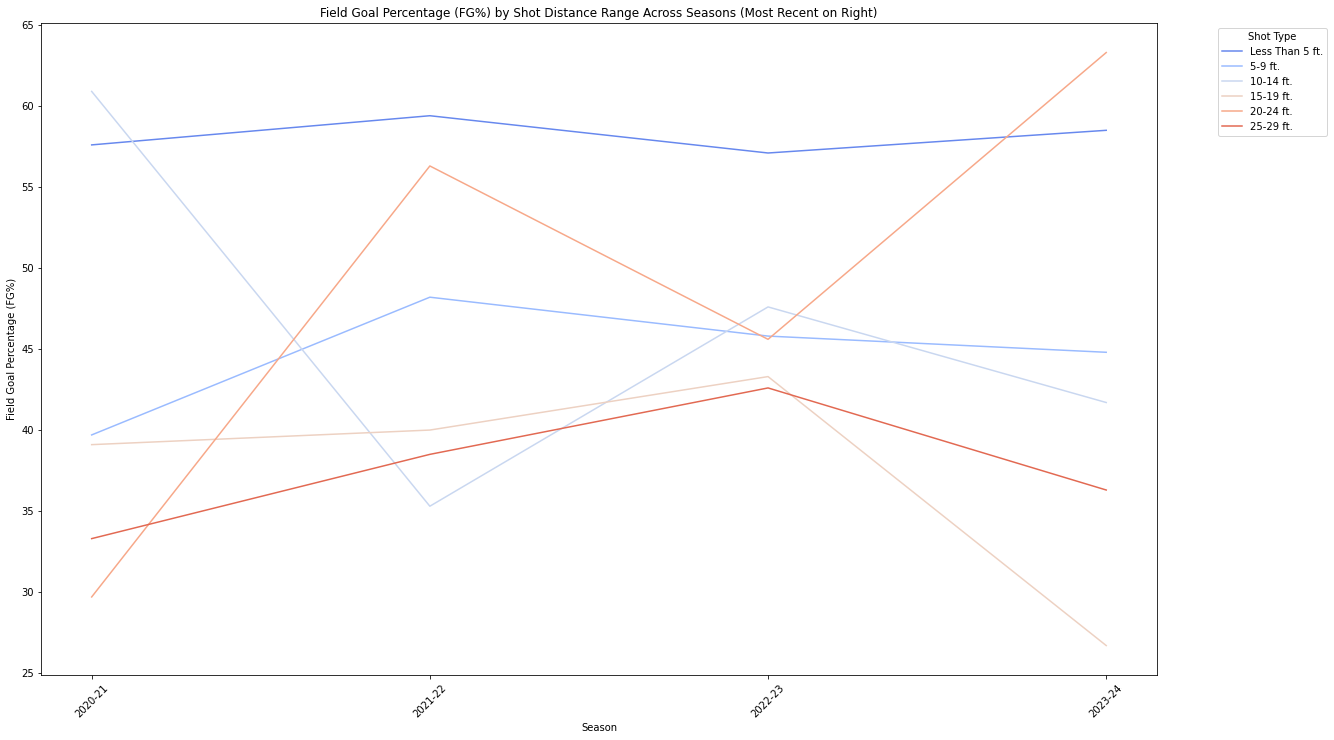

In [19]:
# Filtering the data to get the relevant columns for each range
ranges = shot_distance['SHOT DISTANCE'].unique()
seasons = shot_distance['Season'].unique()

# Reversing the order of the x-axis to show the most recent season on the right
plt.figure(figsize=(20, 12))

# Using the same colormap as before
colormap = sns.color_palette("coolwarm", len(ranges))

# Plotting FG% for each shot range
for idx, shot_range in enumerate(ranges):
    # Filter data for each range
    range_data = shot_distance[shot_distance['SHOT DISTANCE'] == shot_range]

    # Plot with the specified colormap
    sns.lineplot(data=range_data, x='Season', y='FG%', label=shot_range, color=colormap[idx])

# Reversing the x-axis
plt.gca().invert_xaxis()

plt.title('Field Goal Percentage (FG%) by Shot Distance Range Across Seasons (Most Recent on Right)')
plt.xlabel('Season')
plt.ylabel('Field Goal Percentage (FG%)')
plt.xticks(rotation=45)
plt.legend(title='Shot Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

- Maxey's efficiency from less than 9 feet has been relatively stable
- Maxey's efficiency from 10-14 and 15-19 feet reached its peak last season and has regressed this year
- Maxey's efficiency from 20-24 feet had increased significantly this year

In [15]:
shot_type = pd.read_csv('../data/maxey_shot_type.csv')

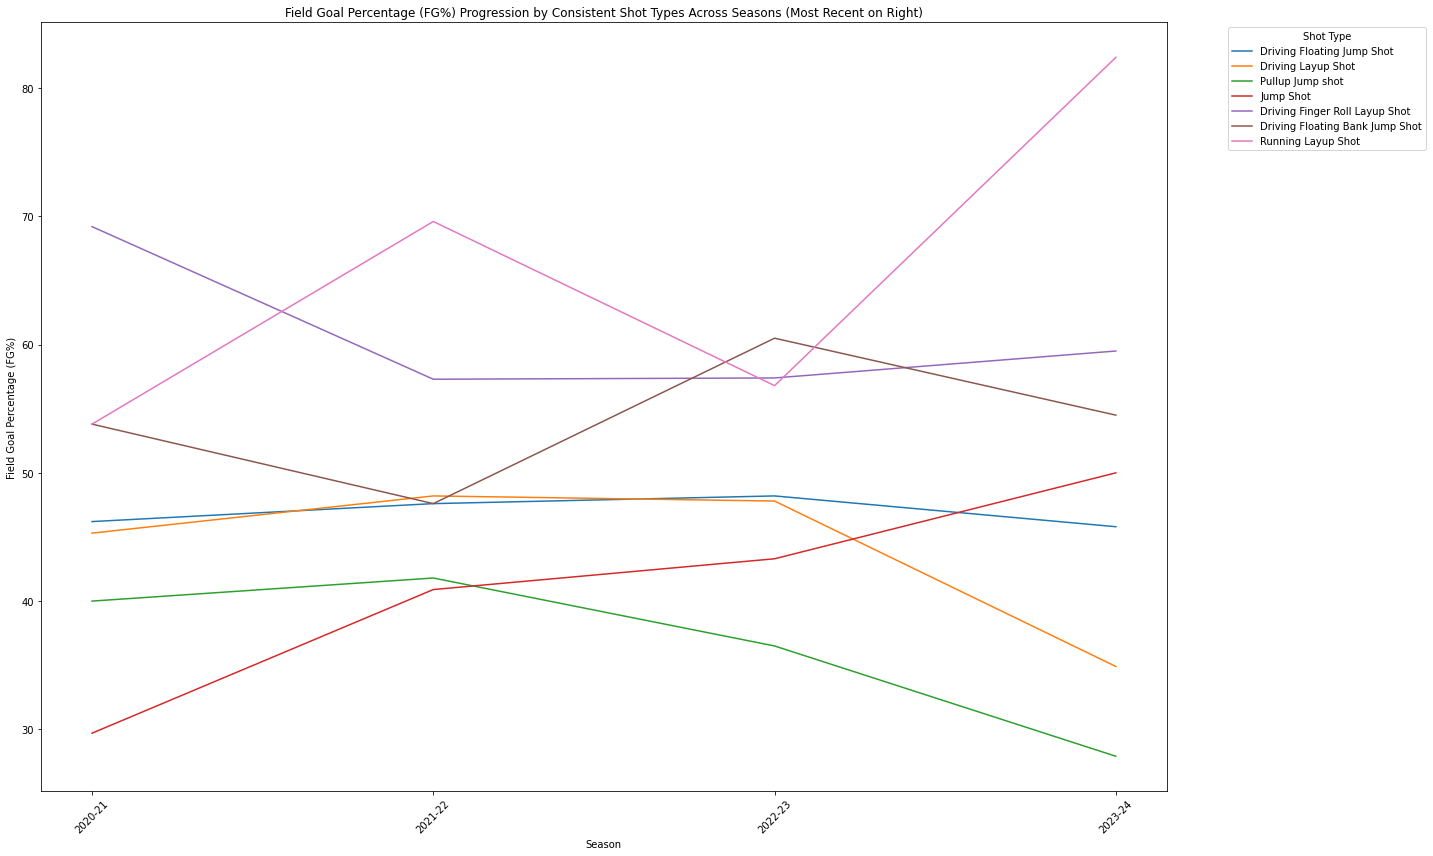

In [17]:
# Filtering out shot types that do not have at least 10 attempts in every single season

# Grouping data by 'SHOT TYPE DETAIL' and 'Season', and checking if FGA is >= 10 in each group
valid_shot_types = shot_type.groupby('SHOT TYPE DETAIL').filter(lambda x: all(x['FGA'] >= 10))

# Getting unique shot types that meet the criteria
valid_unique_shot_types = valid_shot_types['SHOT TYPE DETAIL'].unique()

# Setting up the plot with a larger figure size for clarity
plt.figure(figsize=(20, 12))

# Using a colormap for visual distinction
colormap = sns.color_palette("tab10", len(valid_unique_shot_types))

# Plotting FG% for each valid shot type
for idx, shot_type in enumerate(valid_unique_shot_types):
    # Filter data for each shot type
    type_data = valid_shot_types[valid_shot_types['SHOT TYPE DETAIL'] == shot_type]

    # Sort data by seasons in chronological order
    type_data = type_data.sort_values(by='Season', ascending=False)

    # Plot with the specified colormap
    sns.lineplot(data=type_data, x='Season', y='FG%', label=shot_type, color=colormap[idx])

# Reversing the x-axis to show the most recent season on the right
plt.gca().invert_xaxis()

plt.title('Field Goal Percentage (FG%) Progression by Consistent Shot Types Across Seasons (Most Recent on Right)')
plt.xlabel('Season')
plt.ylabel('Field Goal Percentage (FG%)')
plt.xticks(rotation=45)
plt.legend(title='Shot Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

- Maxey's running layup was is his best shot this year scoring at a stunning efficiency
- Maxey's jump shot efficiency has steadily improved since entering the league
- Maxey's  Driving Layup and Pullup Jump shot have regressed in efficiency this year